In [1]:
import pandas as pd
import numpy as np

In [2]:
myExps   = [3.42525091, 0.62391373, 0.16885540] 
myCoefs  = [0.15432897, 0.53532814, 0.44463454]

In [3]:
s=pd.Series(np.linspace(0,10,11))

In [4]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df=pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))

In [6]:
df

,A,B,C,D
2013-01-01,0.400912,1.419073,-1.113684,0.224065
2013-01-02,-0.269544,-1.109598,-0.303104,0.103339
2013-01-03,0.330562,-0.498780,-1.591173,-1.071478
2013-01-04,-0.458262,1.332568,-0.962128,0.072308
2013-01-05,0.186172,2.266673,-1.864289,-0.065900
2013-01-06,-0.721956,-1.656693,-0.724941,0.897206


In [7]:
df2 = pd.DataFrame({'A': 1.,
   ...:                     'B': pd.Timestamp('20130102'),
   ...:                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
   ...:                     'D': np.array([3] * 4, dtype='int32'),
   ...:                     'E': pd.Categorical(["test", "train", "test","go home"]),
   ...:                     'F': 'foo'})

In [8]:
display(df2)
df2.dtypes

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,go home,foo


A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [16]:
df2[df2.F=='foo'][df2.E=='test']

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
2,1.0,2013-01-02,1.0,3,test,foo


In [86]:
df2 = df.copy()
df2[df2 > 0] = -df2

2013-01-01   -0.804733
2013-01-02   -0.901367
2013-01-03   -0.147248
2013-01-04   -0.633528
2013-01-05   -0.214663
2013-01-06   -2.079598
Freq: D, Name: B, dtype: float64


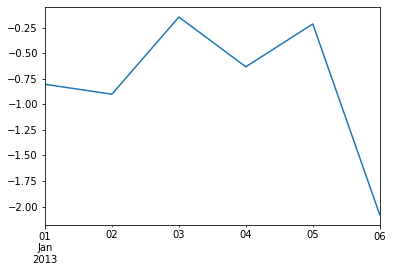

In [87]:
a=df2.B
print(a)
a.plot()

In [1]:
print(a)
a[a>0.804733]

NameError: name 'a' is not defined

In [105]:
ts = pd.Series(np.random.randn(1000),
   .....:                index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])

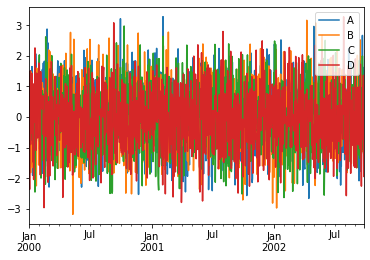

In [106]:
df.plot()

In [107]:
df=df.cumsum()
import matplotlib.pyplot as plt

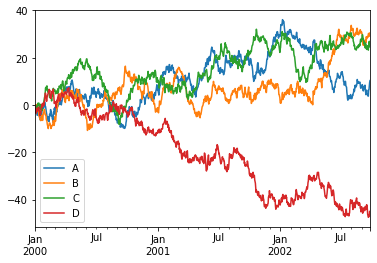

In [108]:
df.plot()
plt.legend(loc='best')

In [116]:
df[df.A>10].A.mean()

18.929564387731897

In [1]:
a={}
print(dir(a))
help(a.update)
a.update({'a':23})
a.update({'a1':'b'})

['__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']
Help on built-in function update:

update(...) method of builtins.dict instance
    D.update([E, ]**F) -> None.  Update D from dict/iterable E and F.
    If E is present and has a .keys() method, then does:  for k in E: D[k] = E[k]
    If E is present and lacks a .keys() method, then does:  for k, v in E: D[k] = v
    In either case, this is followed by: for k in F:  D[k] = F[k]



18.0

In [3]:
a['a']


AttributeError: 'int' object has no attribute '__clas__'